# Описание задания

Используйте базу транзакций интернет-магазина из Великобритании по ссылке. При исследовании данных можно пользоваться любыми инструментами: Excel, Google Таблицы, Python и т. д.

## Задача
Изучить данные и составить аналитический отчёт.

Отчёт должен включать:

    Описание данных: что отражают, их качество и полнота, некорректности и аномалии.
    Описание применённого подхода к анализу данных: ограничения, накладываемые данными, и соответствующие интерпретации допущения.
    Описание бизнес-заказчика, его гипотетических болей и целей развития бизнеса.
    Описание стейкхолдеров отчёта с обоснованием выбранных метрик (системы метрик).
    Рекомендации по модели данных бизнес-заказчика: что вы считаете важным отслеживать в дополнение к тому, что уже есть в датасете.
    Сформулированные выводы и рекомендации для бизнес-заказчика.


In [258]:
#pip install squarify

In [203]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import squarify 
#import plotly.graph_objects as go




if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7


In [361]:
# Читаем xls файл, меняем тип колонок.

df = pd.read_excel('Data_Sample.xlsx', sheet_name='Online Retail', dtype = {"CustomerID": 'Int64',
                                                                            "Country": 'string',
                                                                            "Description": 'string' })
print('Файл прочитан')

Файл прочитан


## Описание данных: что отражают, их качество и полнота, некорректности и аномалии.##

**EDA - первичный (разведочный) анализ данных**


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54214 non-null  object        
 1   StockCode    54214 non-null  object        
 2   Description  54080 non-null  string        
 3   Quantity     54214 non-null  int64         
 4   InvoiceDate  54214 non-null  datetime64[ns]
 5   UnitPrice    54214 non-null  float64       
 6   CustomerID   40643 non-null  Int64         
 7   Country      54214 non-null  string        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2), string(2)
memory usage: 3.4+ MB


In [366]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850,United Kingdom


In [35]:
print ('Уникальных значений номеров заказов InvoiceNo:', len(df['InvoiceNo'].unique()))
print ('Уникальных значений кодов товаров StockCode:', len(df['StockCode'].unique()))  
print ('Уникальных описаний товаров Description:', len(df['Description'].unique()))  
print ('Уникальных идентификаторов клиентов CustomerID:', len(df['CustomerID'].unique()))  
print ('Уникальных стран Country:', len(df['Country'].unique()))  

Уникальных значений номеров заказов InvoiceNo: 14877
Уникальных значений кодов товаров StockCode: 3351
Уникальных описаний товаров Description: 3402
Уникальных идентификаторов клиентов CustomerID: 3820
Уникальных стран Country: 37


In [40]:
print ('Список стран из поля Country:', df['Country'].unique())

Список стран из поля Country: ['United Kingdom' 'Australia' 'Netherlands' 'Norway' 'EIRE' 'Germany'
 'France' 'Switzerland' 'Spain' 'Poland' 'Italy' 'Belgium' 'Lithuania'
 'Japan' 'Portugal' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Israel' 'Greece' 'Hong Kong' 'Singapore'
 'Lebanon' 'United Arab Emirates' 'Czech Republic' 'Canada' 'Unspecified'
 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [367]:
print ('Минимальная цена реального товара:')

display(df.loc[(~df['StockCode'].isin(['DOT','M', 'CRUK', 'BANK CHARGES','D', 'POST', 'AMAZONFEE' ]))&(df['UnitPrice']>0.0)
      ].sort_values(by='UnitPrice').head(1))

print ('Максимальная цена реального товара:')

display(df.loc[(~df['StockCode'].isin(['DOT','M', 'CRUK', 'BANK CHARGES','D', 'POST', 'AMAZONFEE' ]))&(df['UnitPrice']>0.0)
      ].sort_values(by='UnitPrice').tail(1))

Минимальная цена реального товара:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46379,576076,16045,POPART WOODEN PENCILS ASST,100,2020-11-13 16:18:00,0.04,14382,United Kingdom


Максимальная цена реального товара:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11600,546088,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2020-03-09 11:44:00,195.0,12881,United Kingdom


In [368]:
print ('Самая раняя дата и время заказа:', min(df['InvoiceDate']))
print ('Наиболее поздняя дата и время заказа:', max(df['InvoiceDate']))

Самая раняя дата и время заказа: 2019-12-01 08:26:00
Наиболее поздняя дата и время заказа: 2020-12-09 12:50:00


## Описание набора данных
В датасете имеется восемь полей:

**InvoiceNo** - номер заказа. Тип данных - текстовое поле, поскольку некоторые значения представлены с пометкой "С" перед числовым значением.  Пропущеных значений данное поле не имеет. Позиции из одного заказа имеют идентичные номера. Уникальных значений номеров заказов InvoiceNo: 14877

**StockCode** - код товара. Тип данных - текстовое поле. Пропущеных значений данное поле не имеет. Уникальных значений кодов товаров StockCode: 3351
  
**Description** - описание товара. Тип данных - текстовое поле. Имеется 134 пропущенных значения. Возможно попытаться восстановить используя код товара. Уникальных описаний товаров Description: 3402. Описаний больше чем кодов товара.

**Quantity** - количество позиции товара в заказе. Тип данных - целое число. Пропусков не имеется. 

**InvoiceDate** - дата и время заказа товара. Тип данных -  datetime64. Пропусков не имеется. Самая раняя дата и время заказа: 01 декабря 2019 года в 08:26:00
Наиболее поздняя дата и время заказа: 09 декабря 2020 года в  12:50:00. Таким образом имеется год данных для проведения анализа.

**UnitPrice** - цена за единицу  товара. Пропусков не имеется. Тип данных - число с плавающей точкой. Если исключить bp анализа технические записи возвратов, комиссий, ручных записей и т.д., то минимальная цена составляет 4 пенса за позицию 
POPART WOODEN PENCILS ASST,	максимальная цена 195 фунтов стерлингов за товар LOVE SEAT ANTIQUE WHITE METAL.        

**CustomerID** - идентификатор клиента. Уникальных идентификаторов клиентов CustomerID: 3820. Имеется 13571 пропуск, что составляет 25% от всего набора данных. Восстановление невозможно. Серьёзный недостаток, который повлияет на определение характеристик клиентов.

**Country** - страна-местонахождение клиента. Пропусков не наблюдается. Имеется 37 уникальных значений: 
'United Kingdom' 'Australia' 'Netherlands' 'Norway' 'EIRE' 'Germany'
 'France' 'Switzerland' 'Spain' 'Poland' 'Italy' 'Belgium' 'Lithuania'
 'Japan' 'Portugal' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Israel' 'Greece' 'Hong Kong' 'Singapore'
 'Lebanon' 'United Arab Emirates' 'Czech Republic' 'Canada' 'Unspecified'
 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA'



Для проведения дальнейших манипулций используем копию исходного датасета: 

In [369]:
df1 = df.copy(deep=True)

## Выявление аномалий и очистка данных##

Первой очевидной аномалией можно считать **нулевую цену товара**. Возможно таким образом осуществлялась коррекция остатков, но это не записи о реальных продажах или возвратах:

In [370]:
df1.loc[df1.UnitPrice == 0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204,536553,37461,<NA>,3,2019-12-01 14:35:00,0.0,<NA>,United Kingdom
730,536995,35951,<NA>,57,2019-12-03 15:29:00,0.0,<NA>,United Kingdom
731,536998,85067,<NA>,-6,2019-12-03 15:30:00,0.0,<NA>,United Kingdom
732,537005,21692,<NA>,-70,2019-12-03 15:35:00,0.0,<NA>,United Kingdom
733,537009,84534B,<NA>,-80,2019-12-03 15:38:00,0.0,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
51508,579743,21810,check,-135,2020-11-30 14:36:00,0.0,<NA>,United Kingdom
52171,580359,20775,<NA>,-35,2020-12-02 16:11:00,0.0,<NA>,United Kingdom
53536,581207,21688,mixed up,-337,2020-12-07 18:34:00,0.0,<NA>,United Kingdom
53537,581209,21620,<NA>,6,2020-12-07 18:35:00,0.0,<NA>,United Kingdom


Такого рода записи не содержат полезной информации и их можно удалить без потери качества анализа.

In [75]:
 df1.drop(df1[df1['UnitPrice'] == 0.0].index, inplace = True)

В процессе анализа кодов и цены товаров определилась группа "технических" записей связанных с пересылкой, ручным изменением данных, накладными расходами, дисконтамиб оплатой маркетплейса Amazon и т.д.. Данные операции отражены под кодами товаров  'DOT','M', 'CRUK', 'BANK CHARGES','D', 'POST', 'AMAZONFEE'. Поскольку они не отражают продажу реальных товаров их нужно исключить из датасета.

In [56]:
df1.loc[df1['StockCode'].isin(['DOT','M', 'CRUK', 'BANK CHARGES','D', 'POST', 'AMAZONFEE'])
      ].sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
36254,568375,BANK CHARGES,Bank Charges,1,2020-09-26 17:01:00,0.001,13405,United Kingdom
18364,C552569,D,Discount,-240,2020-05-10 12:06:00,0.030,12901,United Kingdom
34919,567462,M,Manual,60,2020-09-20 12:35:00,0.080,14446,United Kingdom
39805,571190,M,Manual,4,2020-10-14 11:43:00,0.120,17771,United Kingdom
34914,567460,M,Manual,3,2020-09-20 12:30:00,0.190,15888,United Kingdom
...,...,...,...,...,...,...,...,...
11832,546329,M,Manual,1,2020-03-11 10:22:00,1687.170,14911,EIRE
42864,C573550,AMAZONFEE,AMAZON FEE,-1,2020-10-31 13:32:00,2185.040,<NA>,United Kingdom
12122,C546557,M,Manual,-1,2020-03-15 09:44:00,2583.760,<NA>,Hong Kong
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2020-08-24 14:53:00,6662.510,<NA>,United Kingdom


"Технические записи" не отражают продажу реальных товаров их нужно исключить из датасета.

In [80]:
df1 = df1.loc[(~df['StockCode'].isin(['DOT','M', 'CRUK', 'BANK CHARGES','D', 'POST', 'AMAZONFEE' ]))]
    

Посмотрим на количество товара в одном заказе:

In [81]:
print('Максимальное количество товара в одном заказе:', max(df1['Quantity']))
print('Минимальное количество товара в одном заказе:', min(df1['Quantity']))

Максимальное количество товара в одном заказе: 2400
Минимальное количество товара в одном заказе: -1296


Отрицательные  значения количества товаров не являются ошибочными, поскольку вместе с префиксом С в столбце InvoiceNo они указывают на возврат товара.

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53717 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53717 non-null  object        
 1   StockCode    53717 non-null  object        
 2   Description  53717 non-null  string        
 3   Quantity     53717 non-null  int64         
 4   InvoiceDate  53717 non-null  datetime64[ns]
 5   UnitPrice    53717 non-null  float64       
 6   CustomerID   40462 non-null  Int64         
 7   Country      53717 non-null  string        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2), string(2)
memory usage: 3.7+ MB


In [84]:
print(f'Из исходного датасета исключено { len(df)-len(df1)} записей')

Из исходного датасета исключено 497 записей


## Анализ данных. Определение ключевых показателей

1. Выделим отдельно дату заказа.

In [372]:
df1 ['InvoiceData'] = df1.InvoiceDate.dt.date

2. Вычислим стоимость позиции в заказе и запишем её в отдельное поле.

In [89]:
df1['Cost'] = df1['Quantity'] * df1['UnitPrice']

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53717 entries, 0 to 54213
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53717 non-null  object        
 1   StockCode    53717 non-null  object        
 2   Description  53717 non-null  string        
 3   Quantity     53717 non-null  int64         
 4   InvoiceDate  53717 non-null  datetime64[ns]
 5   UnitPrice    53717 non-null  float64       
 6   CustomerID   40462 non-null  Int64         
 7   Country      53717 non-null  string        
 8   InvoiceData  53717 non-null  object        
 9   Cost         53717 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(3), string(2)
memory usage: 4.6+ MB


In [91]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceData,Cost
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12-01,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047,United Kingdom,2019-12-01,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047,United Kingdom,2019-12-01,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047,United Kingdom,2019-12-01,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850,United Kingdom,2019-12-01,22.00


Определим общие показатели за имеющийся период:
1. Сумма продаж, количество единиц товаров в заказах, количество всех строк позиций клиентов  по странам.

In [92]:
df_country = df1.groupby(['Country']).agg(Cost_sum = ('Cost', 'sum'), 
                                          Quantity_sum = ('Quantity', 'sum'), 
                                          CustomerID_count=('CustomerID','count')).reset_index()
df_country.sort_values(by='Cost_sum', ascending=False)

,Country,Cost_sum,Quantity_sum,CustomerID_count
35,United Kingdom,842908.44,443514,36104
24,Netherlands,26384.18,20912,230
10,EIRE,26298.17,13845,719
14,Germany,20245.20,11879,915
13,France,17964.63,11043,840
0,Australia,17072.96,9973,130
32,Switzerland,5689.30,3526,176
30,Spain,5535.58,2919,248
31,Sweden,3628.52,4197,47
3,Belgium,3594.06,2364,201


**Вывод** Значительный разрыв между Великобританией Ирландией и остальными страними объясняется размещением Интернет-магазина в Великобритании. Аномальной представляется ситуация по Гонконгу - нет определяемых идентификаторов клиентов, и США - отрицательное количество заказанных единиц товаров.

Выведем подробно информацию по Гонконгу:

In [93]:
df1.loc[df1.Country =='Hong Kong']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceData,Cost
6995,541975,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,2020-01-24 14:24:00,1.65,<NA>,Hong Kong,2020-01-24,59.40
6996,541975,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,24,2020-01-24 14:24:00,3.75,<NA>,Hong Kong,2020-01-24,90.00
6997,541975,20749,ASSORTED COLOUR MINI CASES,6,2020-01-24 14:24:00,7.95,<NA>,Hong Kong,2020-01-24,47.70
6998,541975,20726,LUNCH BAG WOODLAND,20,2020-01-24 14:24:00,1.65,<NA>,Hong Kong,2020-01-24,33.00
6999,541975,22454,MEASURING TAPE BABUSHKA RED,24,2020-01-24 14:24:00,2.95,<NA>,Hong Kong,2020-01-24,70.80
7000,541975,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2020-01-24 14:24:00,3.25,<NA>,Hong Kong,2020-01-24,19.50
15445,549738,23052,RECYCLED ACAPULCO MAT TURQUOISE,2,2020-04-12 09:28:00,8.25,<NA>,Hong Kong,2020-04-12,16.50
15446,549738,22328,ROUND SNACK BOXES SET OF 4 FRUITS,30,2020-04-12 09:28:00,2.95,<NA>,Hong Kong,2020-04-12,88.50
19035,553148,79030G,TUMBLER NEW ENGLAND,24,2020-05-13 14:09:00,0.39,<NA>,Hong Kong,2020-05-13,9.36
19036,553148,84563B,BLUE & WHITE BREAKFAST TRAY,4,2020-05-13 14:09:00,2.95,<NA>,Hong Kong,2020-05-13,11.80


Отсутствие **CustomerID** для заказов из Гонконга вероятно свидетельствет о том что все закзазы оформлялись без регистрации в Интернет-магазине. 

Ситуация с заказами из США:

In [95]:
df1.loc[df1.Country =='USA']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceData,Cost
16553,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,2020-04-19 16:19:00,1.25,12733,USA,2020-04-19,1.25
16554,550644,22990,COTTON APRON PANTRY DESIGN,5,2020-04-19 16:19:00,4.95,12733,USA,2020-04-19,24.75
16555,550644,22301,COFFEE MUG CAT + BIRD DESIGN,6,2020-04-19 16:19:00,2.55,12733,USA,2020-04-19,15.30
16556,550644,22423,REGENCY CAKESTAND 3 TIER,6,2020-04-19 16:19:00,12.75,12733,USA,2020-04-19,76.50
39026,570467,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2020-10-10 16:06:00,1.45,12607,USA,2020-10-10,17.40
39027,570467,22399,MAGNETS PACK OF 4 CHILDHOOD MEMORY,12,2020-10-10 16:06:00,1.25,12607,USA,2020-10-10,15.00
39028,570467,22048,BIRTHDAY BANQUET GIFT WRAP,25,2020-10-10 16:06:00,0.42,12607,USA,2020-10-10,10.50
39029,570467,23518,EMBROIDERED RIBBON REEL RACHEL,6,2020-10-10 16:06:00,2.89,12607,USA,2020-10-10,17.34
39030,570467,22737,RIBBON REEL CHRISTMAS PRESENT,10,2020-10-10 16:06:00,1.65,12607,USA,2020-10-10,16.50
39031,570467,23292,SPACEBOY CHILDRENS CUP,8,2020-10-10 16:06:00,1.25,12607,USA,2020-10-10,10.00


Выделим в датасет **df_sales** только продажи без возвратов:

In [374]:
df_sales = df1.loc[df1['Quantity']>0]

In [380]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53131 entries, 0 to 54213
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53131 non-null  object        
 1   StockCode    53131 non-null  object        
 2   Description  53081 non-null  string        
 3   Quantity     53131 non-null  int64         
 4   InvoiceDate  53131 non-null  datetime64[ns]
 5   UnitPrice    53131 non-null  float64       
 6   CustomerID   39722 non-null  Int64         
 7   Country      53131 non-null  string        
 8   InvoiceData  53131 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 4.1+ MB


In [ ]:
Вычислим процент возвратов:

In [384]:
sales_count = len(df_sales)
print(f'Количество продаж: {sales_count}') 

Количество продаж: 53131


In [385]:
returns_count = len(df1)-len(df_sales)
print(f'Количество возвратов: {returns_count}') 

Количество возвратов: 1083


In [386]:
print (f'Процент возвратов: {(returns_count/(sales_count+returns_count)):.1%}')

Процент возвратов: 2.0%


In [103]:
df_country = df_sales.groupby(['Country']).agg(Cost_sum = ('Cost', 'sum'), 
                                          Quantity_sum = ('Quantity', 'sum'), 
                                          CustomerID_count=('CustomerID','count'),
                                          InvoiceNo_count=('InvoiceNo', 'count'))
df_country.sort_values(by='Cost_sum', ascending=False)

,Cost_sum,Quantity_sum,CustomerID_count,InvoiceNo_count
Country,,,,
United Kingdom,869053.46,455218,35341,48443
EIRE,27321.44,14304,698,757
Netherlands,26399.18,20924,229,229
Germany,20864.82,12102,875,875
France,18262.48,11344,828,835
Australia,17156.59,10009,123,123
Switzerland,5695.90,3528,174,184
Spain,5551.22,2921,246,246
Sweden,4816.52,4437,46,46


**Десятка стран с самыми высоким продажами:**

In [389]:
df_country.sort_values(by='Cost_sum', ascending=False).head(10)

,Cost_sum,Quantity_sum,CustomerID_count,InvoiceNo_count
Country,,,,
United Kingdom,869053.46,455218,35341,48443
EIRE,27321.44,14304,698,757
Netherlands,26399.18,20924,229,229
Germany,20864.82,12102,875,875
France,18262.48,11344,828,835
Australia,17156.59,10009,123,123
Switzerland,5695.90,3528,174,184
Spain,5551.22,2921,246,246
Sweden,4816.52,4437,46,46


In [390]:
df_country_hist_cost = df_country.sort_values(by='Cost_sum', ascending=False).head(10)

In [396]:
#df_country_hist_cost.drop(['Quantity_sum', 'CustomerID_count'], axis= 1 , inplace= True ) 
df_country_hist_cost.drop([ 'CustomerID_count'], axis= 1 , inplace= True ) 

KeyError: "['CustomerID_count'] not found in axis"

In [397]:
df_country_hist_cost

,Cost_sum,Quantity_sum,InvoiceNo_count
Country,,,
United Kingdom,869053.46,455218,48443
EIRE,27321.44,14304,757
Netherlands,26399.18,20924,229
Germany,20864.82,12102,875
France,18262.48,11344,835
Australia,17156.59,10009,123
Switzerland,5695.90,3528,184
Spain,5551.22,2921,246
Sweden,4816.52,4437,46


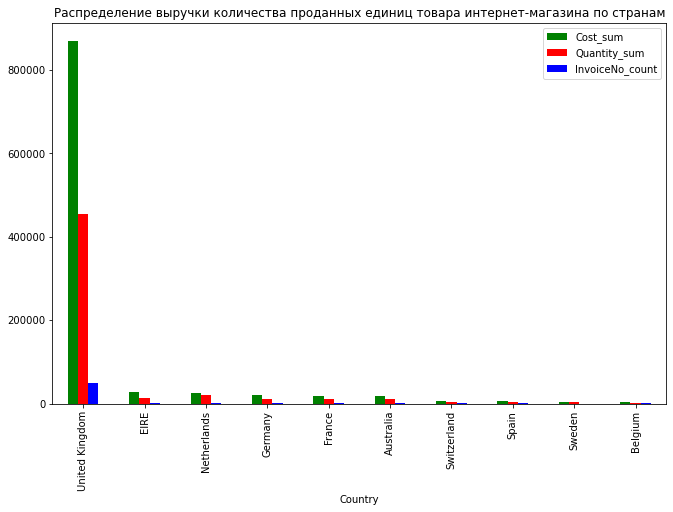

In [399]:
df_country_hist_cost.loc[['United Kingdom', 'EIRE', 'Netherlands', 'Germany', 'France',
                    'Australia', 'Switzerland','Spain', 'Sweden', 'Belgium']].plot.bar(color=['green','red','blue'],
                    title='Распределение выручки количества проданных единиц товара интернет-магазина по странам'
                                  )

plt.savefig('saved_figure.png')

In [409]:
cost_UK = df_country_hist_cost.iloc [0]['Cost_sum']
cost_all = df_country_hist_cost['Cost_sum'].sum()
print(f'Доля Великобритании в общем объёме продаж: {(cost_UK/cost_all):.1%}')
orders_UK = df_country_hist_cost.iloc [0]['InvoiceNo_count']
orders_all = df_country_hist_cost['InvoiceNo_count'].sum()
print(f'Доля Великобритании в общем количестве позиций заказов: {(orders_UK/orders_all):.1%}')

Доля Великобритании в общем объёме продаж: 87.0%
Доля Великобритании в общем количестве позиций заказов: 93.3%


**Лучшие 20 дней по продажам:**

In [108]:
df1[df1['Quantity']>0].groupby('InvoiceData')['Cost'].sum().sort_values(ascending=False).head(20)

InvoiceData
2020-11-14    12028.34
2020-11-07    11930.73
2020-12-07    10606.61
2020-07-28     9708.64
2020-12-08     9592.91
2020-10-05     9449.37
2020-12-05     8920.57
2020-06-30     8588.98
2020-08-17     8530.31
2019-12-07     8475.61
2020-11-09     7901.87
2020-09-22     7763.77
2020-09-20     7444.12
2020-03-29     7322.38
2020-10-20     7311.63
2020-01-14     7224.09
2020-11-23     7128.76
2020-05-24     6843.89
2020-05-12     6772.05
2020-11-03     6753.98
Name: Cost, dtype: float64

**Помесячные продажи** 

Month
1      65205.39
2      49414.77
3      73404.96
4      50088.92
5      75703.27
6      75526.60
7      72820.63
8      76585.54
9      99760.12
10    106953.31
11    151417.45
12    125874.37
Name: Month_Sales, dtype: float64

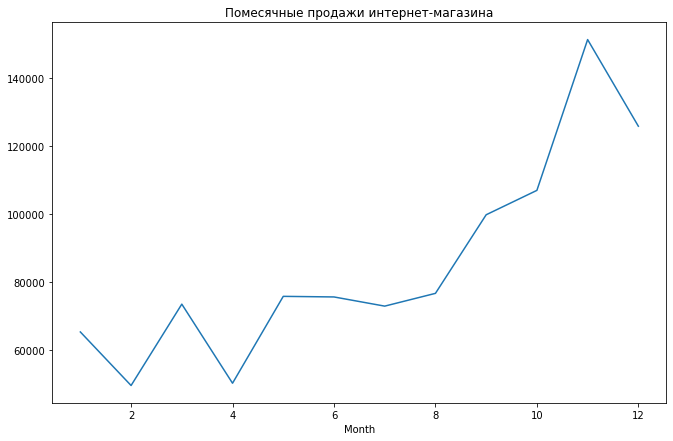

In [252]:
s_month_prod = df_sales.groupby([df_sales.InvoiceDate.dt.year.between(2019, 2020), 
                                  df_sales.InvoiceDate.dt.month])['Cost'].sum()

s_month_prod = s_month_prod.droplevel(level=0)
s_month_prod.index.names = ['Month']
s_month_prod.rename("Month_Sales", inplace=True)
display(s_month_prod)
s_month_prod.plot(title='Помесячные продажи интернет-магазина')

**Помесячные возвраты**

Month
1     1895.45
2     1348.82
3      911.47
4     1523.87
5      651.36
6     1024.45
7     1176.64
8     4979.79
9     5304.90
10    5062.14
11    2449.70
12    3501.23
Name: Month_Returns, dtype: float64

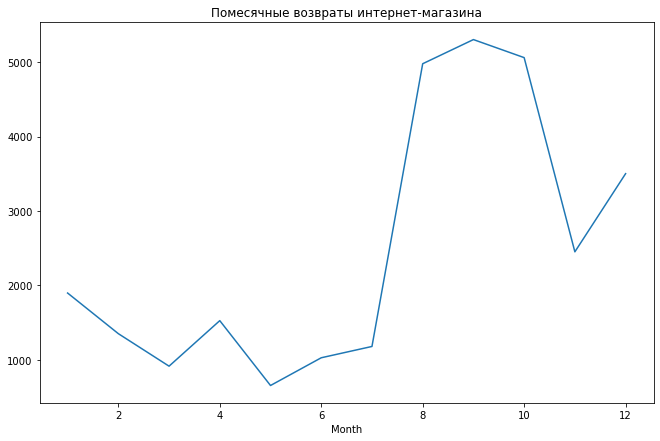

In [245]:
df_returns = df1[df1['InvoiceNo'].str.contains("C", na= False)]
s_month_ret = df_returns.groupby([df_returns.InvoiceDate.dt.year.between(2019, 2020), 
                                  df_returns.InvoiceDate.dt.month])['Cost'].sum().abs()

s_month_ret = s_month_ret.droplevel(level=0)
s_month_ret.index.names = ['Month']
s_month_ret.rename('Month_Returns', inplace=True)
display(s_month_ret)
s_month_ret.plot(title='Помесячные возвраты интернет-магазина')



In [247]:
df_sales_returs = pd.concat([s_month_prod, s_month_ret], axis= 1 )
df_sales_returs.info()
display(df_sales_returs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month_Sales    12 non-null     float64
 1   Month_Returns  12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


,Month_Sales,Month_Returns
Month,,
1,65205.39,1895.45
2,49414.77,1348.82
3,73404.96,911.47
4,50088.92,1523.87
5,75703.27,651.36
6,75526.60,1024.45
7,72820.63,1176.64
8,76585.54,4979.79
9,99760.12,5304.90


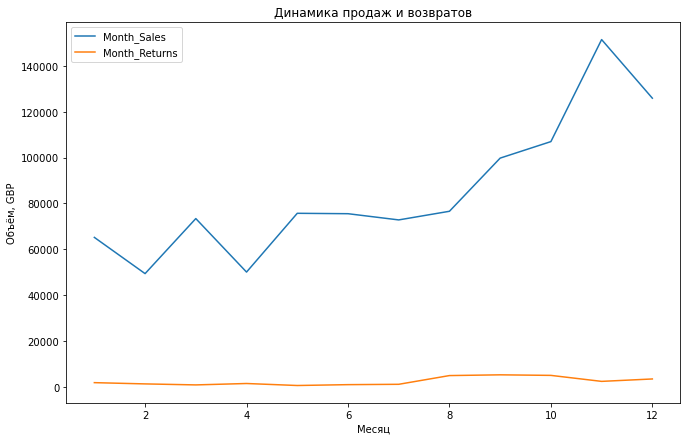

In [256]:
# можем использовать цикл, чтобы построить графики продаж и возвратов
for operation in df_sales_returs.columns:
    plt.plot(df_sales_returs.index,df_sales_returs[operation])
plt.title('Динамика продаж и возвратов')
plt.xlabel('Месяц')
plt.ylabel('Объём, GBP') 
plt.legend(df_sales_returs)



Продажи возрастают к окончанию года в связи с тем что начинаются период подготовки к рождественским и новогодним праздникам. Поскольку полноценной статискики за декабрь-месяц не имееется достоверно определить уровень падения не представляется возможным. С ростом продаж пропорциональное возрастает и уровень возвратов.

In [ ]:
Проверим данное утверждение вычислив коэффицент корреляции

In [403]:
corr = df_sales_returs['Month_Sales']. corr(df_sales_returs['Month_Returns'])
print(f'Коэффициент корреляции между продажами и возвратами: {corr:.2f}')

Коэффициент корреляции между продажами и возвратами: 0.45


**Средний чек (AOV) по всем странам за всё время наблюдения**

In [311]:
sumCost=df1[df1['Quantity']>0]['Cost'].sum()
countID=df1[df1['Quantity']>0]['InvoiceNo'].count()
avgReceipt = sumCost/countID
print(f"Средний (AOV) чек по всем странам за всё время наблюдения: {avgReceipt:5.2f} фунтов стерлингов" )

Средний (AOV) чек по всем странам за всё время наблюдения: 19.36 фунтов стерлингов


**Средний (AOV) чек по отдельным странам за всё время наблюдения**

,Pay
Country,
Australia,139.484472
Netherlands,115.280262
Sweden,104.706957
Japan,80.154815
Denmark,59.671765
Lithuania,48.600000
Czech Republic,41.100000
Lebanon,39.600000
Singapore,36.795000


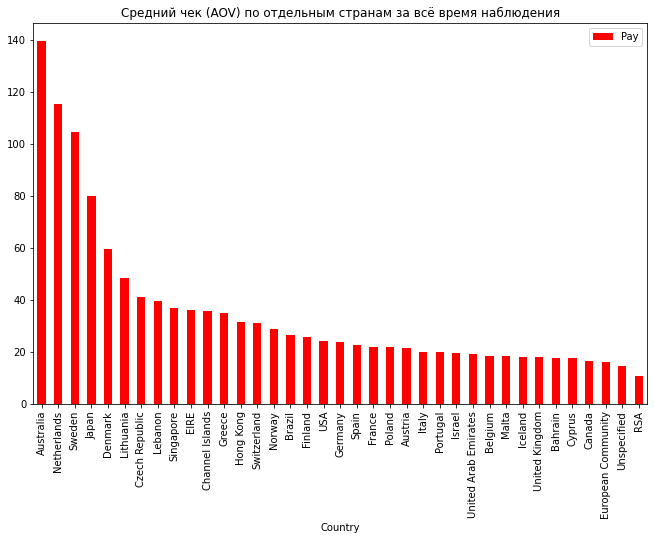

In [312]:
df_avgReceipt_Country = pd.DataFrame() 

df_avgReceipt_Country['Pay'] = (df1[df1['Quantity']>0]['Cost'].groupby(df1.Country).sum()/
df1[df1['Quantity']>0]['InvoiceNo'].groupby(df1.Country).count())

display(df_avgReceipt_Country.sort_values( by='Pay', ascending=False))

df_avgReceipt_Country.sort_values( by='Pay', ascending=False).plot.bar(color=['red'],
                                   title='Средний чек (AOV) по отдельным странам за всё время наблюдения'
                                  )

Высокий отностительно общего уровня показатель AOV  по Австралии, Нидерландам, Японии, Дании и Литве может быть объяснен тем, что  доставка в данные регионы занимает длительное время и клиенты оформляют заказы на эксклюзивные товары, которые недоступны в этих странах.

**Киты-покупатели по сумме покупок (топ 20)**

,CustomerID,Pay_sum
0,18102,26533.44
1,14646,25519.16
2,17450,23000.10
3,12415,16102.89
4,14911,13551.28
5,14156,12092.71
6,17949,12048.08
7,17511,9534.21
8,15769,8129.04
9,13694,7722.13


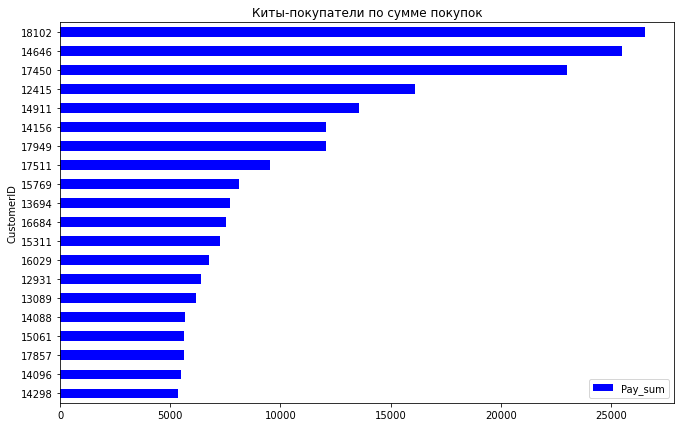

In [296]:
df_whale = pd.DataFrame() 

df_whale['Pay_sum'] = df1[df1['Quantity']>0]['Cost'].groupby(df1.CustomerID).sum()

df_whale = df_whale.sort_values( by='Pay_sum', ascending=False).head(20)
df_whale = df_whale.reset_index()

display(df_whale)

df_whale.sort_values( by='Pay_sum', ascending=True).plot.barh(x='CustomerID', 
                                                              y='Pay_sum', 
                                                              color=['blue'], 
                                                              title='Киты-покупатели по сумме покупок')

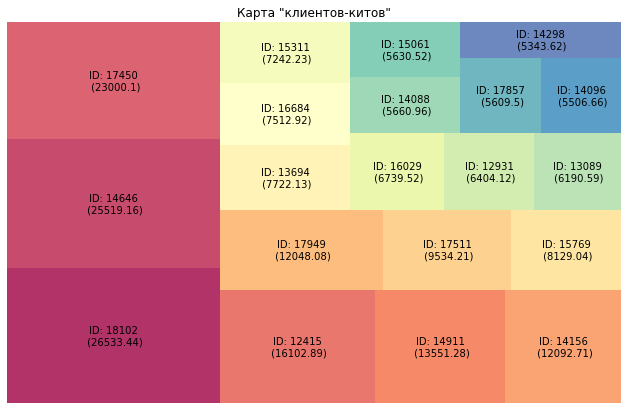

In [297]:
# Сделаем метки
labels =df_whale.apply(lambda x:"ID: "+ str(int(x[0])) + "\n (" + str(round(x[1],2))+")", axis=1)
# Сохраним в список размеры
sizes = df_whale['Pay_sum'].values.tolist()
# Палитра
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Построение
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
# Метки
plt.title('Карта "клиентов-китов"')
plt.axis('off')
plt.show()

**Лояльные покупатели по количеству позиций заказов (топ 20)**

,CustomerID,InvoiceNo_count
0,17841,759
1,14911,542
2,14096,539
3,12748,445
4,14606,267
5,15311,243
6,14646,194
7,13089,174
8,13263,166
9,14298,160


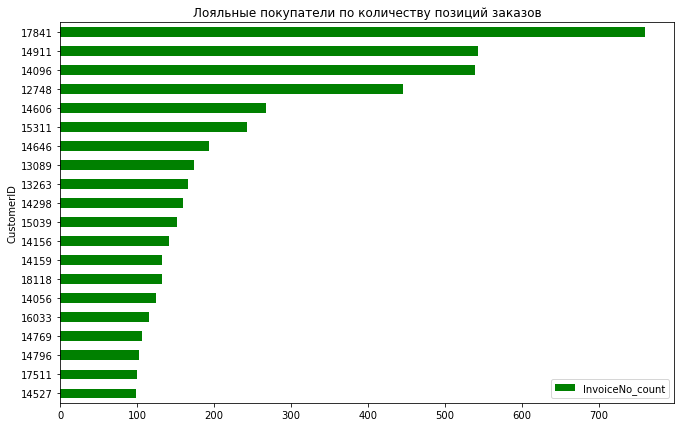

In [302]:
df_fq_pay = pd.DataFrame() 

df_fq_pay = df_sales.groupby(df_sales.CustomerID).agg(InvoiceNo_count=('InvoiceNo', 'count'))
df_fq_pay = df_fq_pay.sort_values( by='InvoiceNo_count', ascending=False).head(20)
df_fq_pay = df_fq_pay.reset_index()

display(df_fq_pay)

df_fq_pay.sort_values( by='InvoiceNo_count', ascending=True).plot.barh(  x='CustomerID', 
                                                                         y='InvoiceNo_count', 
                                                                         color=['green'],
                                        title='Лояльные покупатели по количеству позиций заказов')


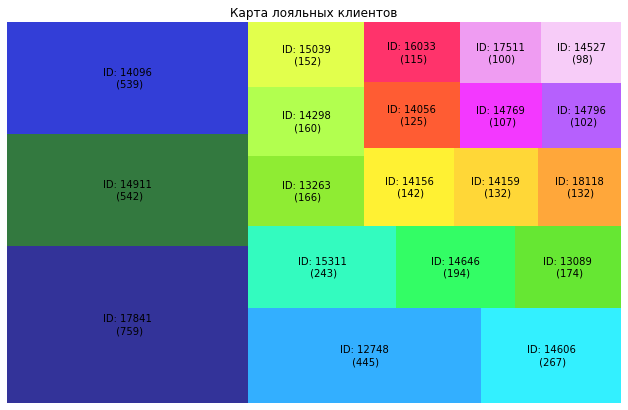

In [404]:
# Сделаем метки
labels =df_fq_pay.apply(lambda x:"ID: "+ str(int(x[0])) + "\n (" + str(round(x[1],2))+")", axis=1)
# Сохраним в список размеры
sizes = df_fq_pay['InvoiceNo_count'].values.tolist()
# Палитра
#colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

colors = [plt.cm.gist_ncar(i/float(len(labels))) for i in range(len(labels))]
# Построение
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
# Метки
plt.title('Карта лояльных клиентов')
plt.axis('off')
plt.show()

**Наболее востребованные товары по выручке (топ 10)**

In [186]:
df_goods_sales = df_sales.groupby(df_sales.StockCode).agg(
                                                          StockCode_sum=('Cost', 'sum')).sort_values(
                                                          by='StockCode_sum', ascending=False).head(10)

df_goods_sales = df_goods_sales.merge(df_sales, how='inner',  left_on='StockCode', right_on='StockCode', indicator=False)
df_goods_sales  = df_goods_sales.drop(columns=['InvoiceNo', 
                                               'Quantity', 
                                               'InvoiceDate', 
                                               'UnitPrice', 
                                               'CustomerID', 
                                              'Country',
                                              'InvoiceData',
                                              'Cost'])
df_goods_sales = df_goods_sales.drop_duplicates(keep='first')
df_goods_sales.style.hide_index()
display(df_goods_sales.style.hide_index())

StockCode,StockCode_sum,Description
22423,17135.000000,REGENCY CAKESTAND 3 TIER
85099B,10092.030000,JUMBO BAG RED RETROSPOT
85123A,9609.590000,WHITE HANGING HEART T-LIGHT HOLDER
85123A,9609.590000,CREAM HANGING HEART T-LIGHT HOLDER
47566,7412.360000,PARTY BUNTING
84879,6975.590000,ASSORTED COLOUR BIRD ORNAMENT
22386,5794.930000,JUMBO BAG PINK POLKADOT
22086,5714.650000,PAPER CHAIN KIT 50'S CHRISTMAS
79321,5501.530000,CHILLI LIGHTS
22470,5393.930000,HEART OF WICKER LARGE


В выборке выявлена некорректность, связанная с тем что уникальному коду товара могут соответствовать несколько разных описаний. Так например для кода 85123A, имеется два описания: первое - WHITE HANGING HEART T-LIGHT HOLDER, второе - CREAM HANGING HEART T-LIGHT HOLDER.  

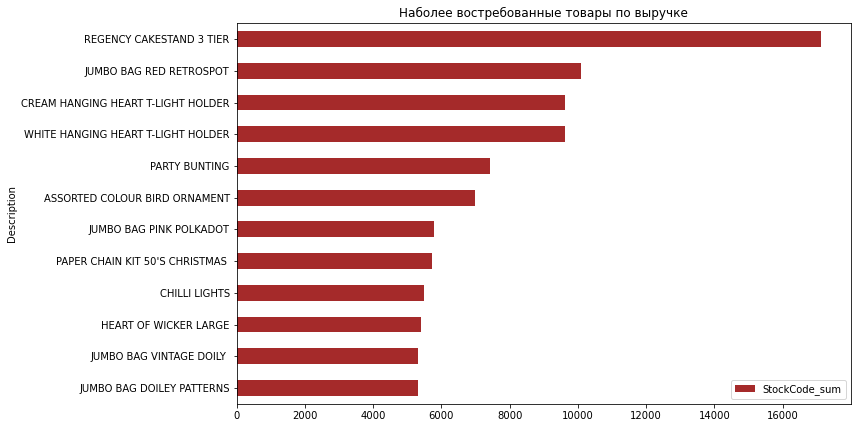

In [188]:
df_goods_sales.sort_values( by='StockCode_sum', ascending=True).plot.barh(color=['brown'], 
                                   x='Description', 
                                   y='StockCode_sum',
                                   title='Наболее востребованные товары по выручке'
                                                                         )

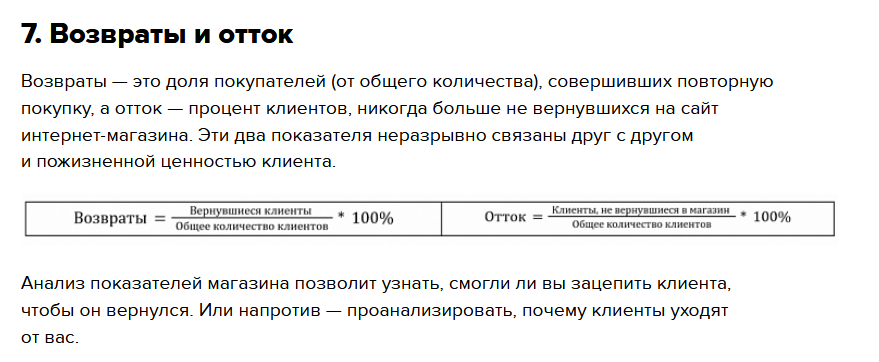

In [335]:
# Оставить только уникальные строки: одну на каждый заказ
df_orders =  df_sales.drop_duplicates(subset='InvoiceNo', keep='first')


In [355]:
#Удалим строки с неопределенными ID клиентов 
#df_orders = df_orders[df_orders['CustomerID'].notna()]
#df_orders['CustomerID'].nunique()

RPR=df_orders['CustomerID'].nunique()/len(df_orders)
print(f"Частота повторных покупок (RPR — repeat purchase rate): {RPR:.1%}")

Частота повторных покупок (RPR — repeat purchase rate): 27.3%


In [354]:
ch_r = 1-rr
print(f"Коэффициент оттока пользователей (Churn Rate): {ch_r:.1%}")

Коэффициент оттока пользователей (Churn Rate): 72.7%
